# Estudo estatístico dos preços dos combustiveis no Brasil


O objetivo deste estudo é aplicar técnicas de ciência de dados e o desenvolvimento de pipelines de dados, utilizando a base de dados pública da Agência Nacional do Petróleo (ANP) sobre a série histórica dos preços dos combustíveis automotivos


Dataset: https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp?idOrganizacao=88609f8c-a0ee-46eb-9294-f2175a6b561e&pagina=1



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# ETL - extrair, transformar e carregar

In [2]:
def transformar_arquivo(arquivo):
    # Replace 'latin-1' with the actual encoding of your CSV files
    df = pd.read_csv(arquivo, sep=';', decimal=',', encoding='utf-8', encoding_errors='ignore')
    df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')
    return df

caminho = "Caminho da base"
arquivos = [os.path.join(caminho, arquivo) for arquivo in os.listdir(caminho) if arquivo.endswith('.csv')]

dataframes = []
for arquivo in arquivos:
    df = transformar_arquivo(arquivo)
    dataframes.append(df)

df_final = pd.concat(dataframes, ignore_index=True)

df_final = df_final.astype({'Regiao - Sigla': 'category'})  # Exemplo de alteração de tipo


O código tem como objetivo ler múltiplos arquivos CSV, realizar transformações nos dados e concatená-los em um único DataFrame para análise.

Passos principais:

Leitura de Arquivos: Os arquivos CSV são lidos usando pd.read_csv, com parâmetros para separadores, decimais e codificação.
Transformação de Dados: A coluna 'Data da Coleta' é convertida para o formato de data.
Listagem de Arquivos: Os arquivos CSV são listados no diretório especificado.
Criação de DataFrames: Cada arquivo CSV é transformado em um DataFrame e armazenado em uma lista.
Concatenação: Os DataFrames são combinados em um único DataFrame com pd.concat.
Limpeza de Dados: Algumas colunas são renomeadas, e tipos de dados são ajustados para otimizar memória e facilitar o manuseio.
Observações:

A codificação e o formato de data podem ser ajustados conforme necessário.
O código é eficiente para manipular grandes volumes de dados, com sugestões de melhorias como o uso de chunksize para leitura em pedaços.


In [26]:
df_final

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,SENADOR GUIOMARD,AUTO POSTO SANTA RITA LTDA.,07.600.665/0001-85,AVENIDA CASTELO BRANCO,122,NaN,TRIUNFO,69925-000,GASOLINA,2015-01-01,3.44,NaN,R$ / litro,DNP
1,N,AC,SENADOR GUIOMARD,AUTO POSTO SANTA RITA LTDA.,07.600.665/0001-85,AVENIDA CASTELO BRANCO,122,NaN,TRIUNFO,69925-000,ETANOL,2015-01-01,3.00,NaN,R$ / litro,DNP
2,N,AC,SENADOR GUIOMARD,AUTO POSTO SANTA RITA LTDA.,07.600.665/0001-85,AVENIDA CASTELO BRANCO,122,NaN,TRIUNFO,69925-000,DIESEL,2015-01-01,3.10,NaN,R$ / litro,DNP
3,N,AC,SENADOR GUIOMARD,AUTO POSTO SANTA RITA LTDA.,07.600.665/0001-85,AVENIDA CASTELO BRANCO,122,NaN,TRIUNFO,69925-000,DIESEL S10,2015-01-01,3.20,NaN,R$ / litro,DNP
4,N,AC,SENADOR GUIOMARD,AUTO POSTO QUINARI LTDA,10.209.732/0001-40,AVENIDA CASTELO BRANCO,2709,NaN,CENTRO,69925-000,GASOLINA,2015-01-01,3.44,2.784,R$ / litro,SABBÁ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654730,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,2024-06-28,3.99,NaN,R$ / litro,IPIRANGA
8654731,NE,MA,CAXIAS,MAXXI PETRONORTE COMBUSTIVEIS E DERIVADOS LTDA,30.523.175/0001-44,RUA MANOEL GONCALVES,1458,NaN,CENTRO,65600-110,GASOLINA,2024-06-28,5.79,NaN,R$ / litro,BRANCA
8654732,NE,MA,CAXIAS,MAXXI PETRONORTE COMBUSTIVEIS E DERIVADOS LTDA,30.523.175/0001-44,RUA MANOEL GONCALVES,1458,NaN,CENTRO,65600-110,GASOLINA ADITIVADA,2024-06-28,5.89,NaN,R$ / litro,BRANCA
8654733,NE,MA,CAXIAS,MAXXI PETRONORTE COMBUSTIVEIS E DERIVADOS LTDA,30.523.175/0001-44,RUA MANOEL GONCALVES,1458,NaN,CENTRO,65600-110,DIESEL S10,2024-06-28,5.64,NaN,R$ / litro,BRANCA


In [87]:
# Selecionando as colunas desejadas e criando uma cópia explícita
df_filtrado = df_final[['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Unidade de Medida', 'Bandeira']].copy()

# Criando a coluna ANO-MES
df_filtrado['ANO-MES'] = df_filtrado['Data da Coleta'].dt.strftime('%Y-%m')

# Exibindo o DataFrame filtrado completo
df_filtrado


,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,ANO-MES
0,N,AC,SENADOR GUIOMARD,GASOLINA,2015-01-01,3.44,R$ / litro,DNP,2015-01
1,N,AC,SENADOR GUIOMARD,ETANOL,2015-01-01,3.00,R$ / litro,DNP,2015-01
2,N,AC,SENADOR GUIOMARD,DIESEL,2015-01-01,3.10,R$ / litro,DNP,2015-01
3,N,AC,SENADOR GUIOMARD,DIESEL S10,2015-01-01,3.20,R$ / litro,DNP,2015-01
4,N,AC,SENADOR GUIOMARD,GASOLINA,2015-01-01,3.44,R$ / litro,SABBÁ,2015-01
...,...,...,...,...,...,...,...,...,...
8654730,S,PR,CAMPO LARGO,ETANOL,2024-06-28,3.99,R$ / litro,IPIRANGA,2024-06
8654731,NE,MA,CAXIAS,GASOLINA,2024-06-28,5.79,R$ / litro,BRANCA,2024-06
8654732,NE,MA,CAXIAS,GASOLINA ADITIVADA,2024-06-28,5.89,R$ / litro,BRANCA,2024-06
8654733,NE,MA,CAXIAS,DIESEL S10,2024-06-28,5.64,R$ / litro,BRANCA,2024-06


# 1. Entendendo os dados
Qual a estrutura dos dados? Quais são as variáveis, seus tipos e o período de tempo coberto?

Quais são os combustíveis e estados representados na base de dados?


In [28]:
# Informações sobre o dataset
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8654735 entries, 0 to 8654734
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao - Sigla     category      
 1   Estado - Sigla     object        
 2   Municipio          object        
 3   Produto            object        
 4   Data da Coleta     datetime64[ns]
 5   Valor de Venda     float64       
 6   Unidade de Medida  object        
 7   Bandeira           object        
 8   ANO-MES            object        
dtypes: category(1), datetime64[ns](1), float64(1), object(6)
memory usage: 536.5+ MB


In [75]:
#período de tempo coberto no dataset
data_inicial = df_filtrado['Data da Coleta'].min()
data_final = df_filtrado['Data da Coleta'].max()

print("Data inicial:", data_inicial)
print("Data final:", data_final)

Data inicial: 2015-01-01 00:00:00
Data final: 2024-06-28 00:00:00


In [30]:
# Verificar os valores únicos para cada coluna
print('Produtos do dataset:',df_filtrado['Produto'].unique())
print('Estados do dataset:', df_filtrado['Estado - Sigla'].unique())

Produtos do dataset: ['GASOLINA' 'ETANOL' 'DIESEL' 'DIESEL S10' 'GNV' 'GASOLINA ADITIVADA']
Estados do dataset: ['AC' 'BA' 'ES' 'MA' 'MG' 'PA' 'PB' 'RJ' 'RO' 'RS' 'SE' 'TO' 'PE' 'PI'
 'SP' 'PR' 'AL' 'AM' 'AP' 'CE' 'DF' 'GO' 'MS' 'MT' 'SC' 'RN' 'RR']


# Alguns questionamentos para análise

Como se comportaram os preços de venda de cada produto ao longo do tempo?

Qual o preço médio, mediana, desvio padrão e intervalo dos preços de cada combustível por estado e por tipo de produto?
  
Qual a frequência dos diferentes valores de preços?
 
Existe correlação entre os preços dos diferentes combustíveis?


______


### Métricas Estatíscias por Produto e Estado

In [15]:
# Agrupando os dados por produto, estado e ano para calcular as estatísticas
grouped = df_filtrado.groupby(['Produto', 'Estado - Sigla', df_filtrado['Data da Coleta'].dt.year])['Valor de Venda'].agg(['mean', 'median', 'std', 'min', 'max'])

# Resetando o índice para transformar as colunas de agrupamento em colunas regulares
resultados = grouped.reset_index()

# Renomeando as colunas para melhor compreensão
resultados.columns = ['Produto', 'Estado', 'Ano', 'Preço Médio', 'Mediana', 'Desvio Padrão', 'Preço Mínimo', 'Preço Máximo']

# Exibindo os resultados
resultados

,Produto,Estado,Ano,Preço Médio,Mediana,Desvio Padrão,Preço Mínimo,Preço Máximo
0,DIESEL,AC,2015,3.424692,3.400,0.193182,3.000,3.990
1,DIESEL,AC,2016,3.647864,3.540,0.190391,3.420,4.070
2,DIESEL,AC,2017,3.871032,3.800,0.232519,3.200,4.470
3,DIESEL,AC,2018,4.290972,4.240,0.214908,3.380,4.890
4,DIESEL,AC,2019,4.440068,4.399,0.187690,4.040,4.990
...,...,...,...,...,...,...,...,...
1414,GNV,SP,2024,4.515626,4.490,0.326092,3.580,5.590
1415,GNV,TO,2016,3.049000,3.049,NaN,3.049,3.049
1416,GNV,TO,2018,3.480000,3.480,NaN,3.480,3.480
1417,GNV,TO,2019,3.499000,3.499,0.000000,3.499,3.499


### Evolução dos Preços de Combustíveis

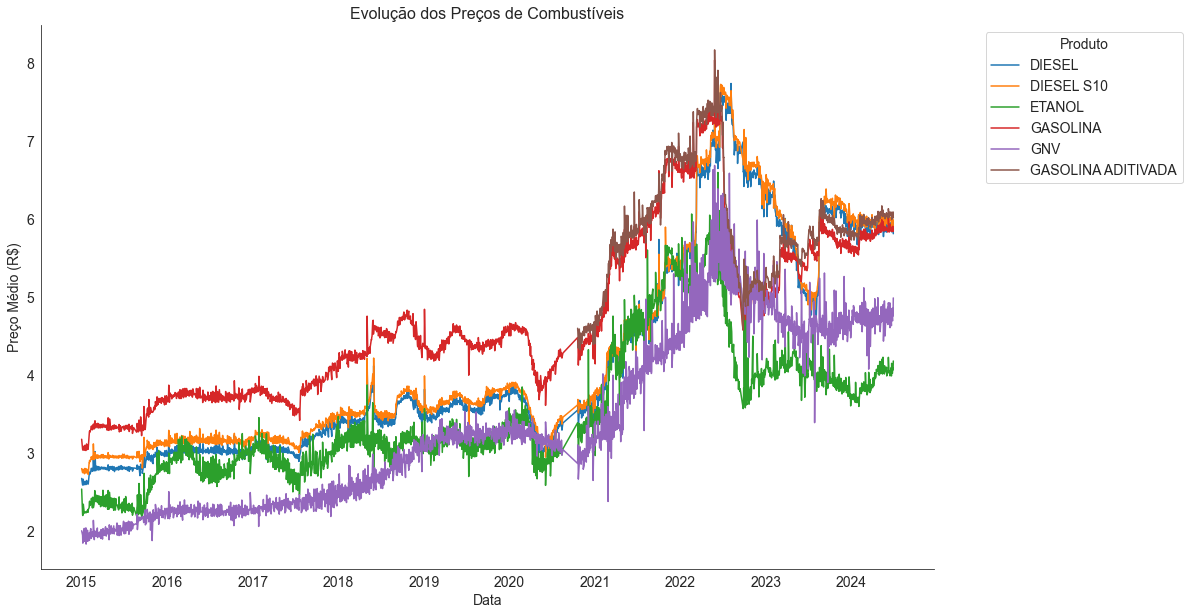

In [31]:
#Média dos valores

# Agrupando os dados por data e produto, calculando o valor de venda final
df_agrupado = df_filtrado.groupby(['Data da Coleta', 'Produto'])['Valor de Venda'].mean().reset_index()

# Configurando o estilo do gráfico
sns.set_style("white")

# Criando o gráfico de linha
plt.figure(figsize=(16, 10))
ax = sns.lineplot(data=df_agrupado, x='Data da Coleta', y='Valor de Venda', hue='Produto')

# Adicionando título e rótulos
plt.title('Evolução dos Preços de Combustíveis', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Preço Médio (R$)', fontsize=14)

# Aumentando o tamanho dos valores dos rótulos dos eixos
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Personalizando a legenda
plt.legend(title='Produto', fontsize=14, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')


# Removendo o contorno e os espinhos desnecessários
ax.spines['top'].set_visible(False)
ax.spines.right.set_visible(False)
ax.set_frame_on(True)



# Exibindo o gráfico
plt.show()

### Preço médio por tipo de combustivel e por estado - 2015 Vs. 2024*

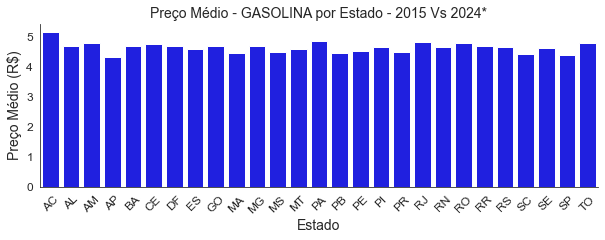

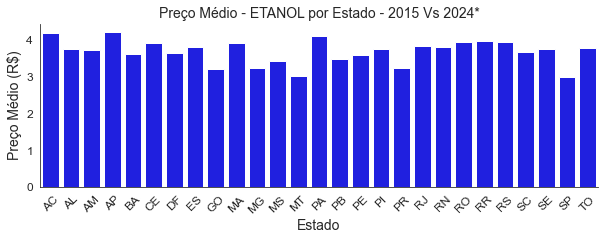

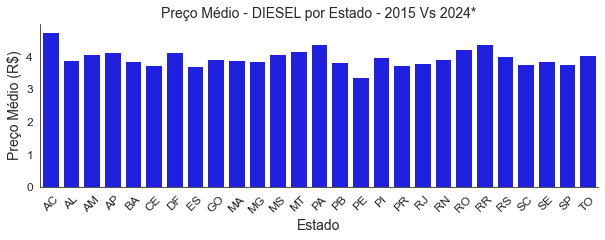

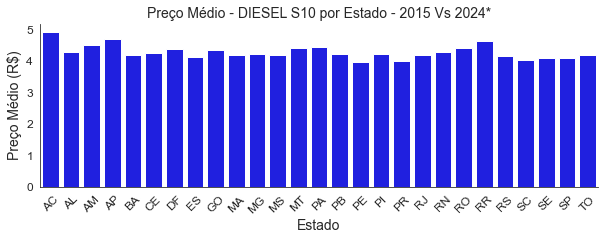

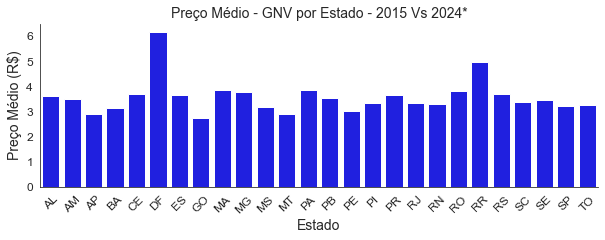

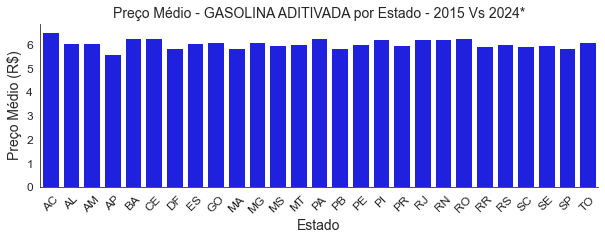

In [86]:
# Obtendo a lista de produtos únicos
produtos = df_filtrado['Produto'].unique()

# Criando gráficos separados para cada tipo de produto
for produto in produtos:
    # Filtrando os dados para o produto atual
    df_produto = df_filtrado[df_filtrado['Produto'] == produto]
    
    # Calculando o preço médio por estado
    preco_medio_por_estado = df_produto.groupby('Estado - Sigla')['Valor de Venda'].mean().reset_index()
    
    # Criando o gráfico de barras
    plt.figure(figsize=(10, 3))
    ax = sns.barplot(x='Estado - Sigla', y='Valor de Venda', data=preco_medio_por_estado, color='blue')
    
    # Personalizando o gráfico
    plt.title(f'Preço Médio - {produto} por Estado - 2015 Vs 2024*', fontsize=14)
    plt.xlabel('Estado', fontsize=14)
    plt.ylabel('Preço Médio (R$)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Removendo o contorno e os espinhos desnecessários
    ax.spines['top'].set_visible(False)
    ax.spines.right.set_visible(False)
    ax.set_frame_on(True)
    
    # Exibindo o gráfico
    plt.show()


# Histograma de distribuição dos valores entre 2015 - 2024

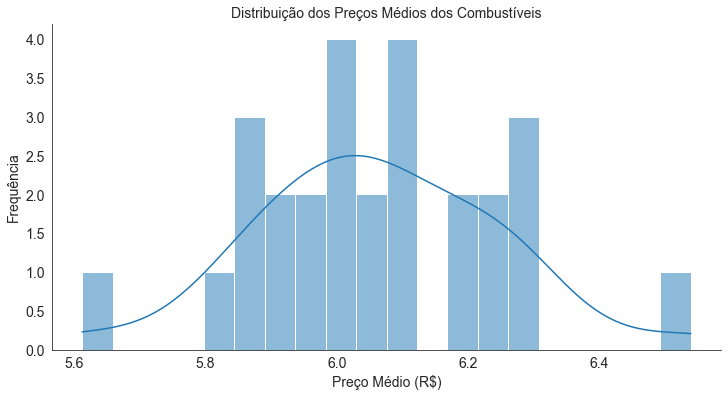

In [59]:
# Criando o histograma
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=preco_medio_por_estado, x='Valor de Venda', bins=20, kde=True)

# Personalizando o gráfico
plt.title('Distribuição dos Preços Médios dos Combustíveis', fontsize=14)
plt.xlabel('Preço Médio (R$)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Removendo o contorno e os espinhos desnecessários
ax.spines['top'].set_visible(False)
ax.spines.right.set_visible(False)
ax.set_frame_on(True)


plt.show()

### Analisando a evolução dos preços por estado durante todo o período

In [73]:
# Agrupando os dados por estado e data para calcular as médias

# Obtendo o ano da primeira e última data
primeiro_ano = 2015
ultimo_ano = 2024

# Filtrando os dados para os anos desejados
df_primeira_data = df_filtrado[df_filtrado['Data da Coleta'].dt.year == primeiro_ano].groupby('Estado - Sigla')['Valor de Venda'].mean().reset_index()
df_ultima_data = df_filtrado[df_filtrado['Data da Coleta'].dt.year == ultimo_ano].groupby('Estado - Sigla')['Valor de Venda'].mean().reset_index()

# Renomeando as colunas para identificação
df_primeira_data.columns = ['Estado - Sigla', 'Media_2015']
df_ultima_data.columns = ['Estado - Sigla', 'Media_2024']

# Mesclando os DataFrames para combinar as informações
df_valores_estado = pd.merge(df_primeira_data, df_ultima_data, on='Estado - Sigla')

# Calculando a variação percentual
df_valores_estado['Variacao_Percentual_2015 vs. 2024'] = ((df_valores_estado['Media_2024'] - df_valores_estado['Media_2015']) / df_valores_estado['Media_2015']) * 100


In [74]:
df_valores_estado

,Estado - Sigla,Media_2015,Media_2024,Variacao_Percentual
0,AC,3.532703,6.871982,94.524756
1,AL,2.917904,5.541569,89.916092
2,AM,3.215445,6.048142,88.096569
3,AP,3.231015,5.996037,85.577475
4,BA,2.946913,5.639563,91.371855
5,CE,3.049544,5.657155,85.508197
6,DF,3.050218,5.378698,76.338132
7,ES,2.991021,5.592421,86.973626
8,GO,2.889720,5.295388,83.249159
9,MA,3.004016,5.568216,85.359059


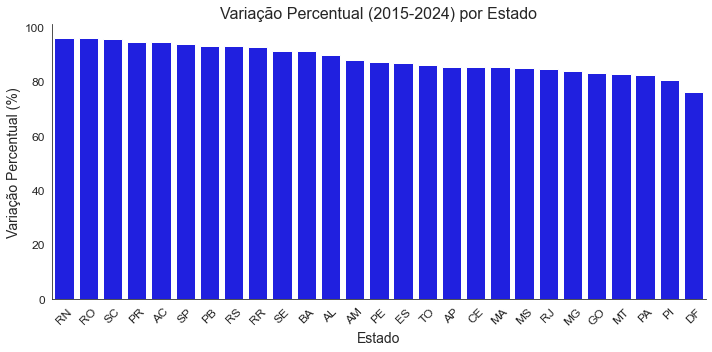

In [79]:
# Ordenando o DataFrame por Variacao_Percentual para melhor visualização
df_valores_estado = df_valores_estado.sort_values(by='Variacao_Percentual', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='Estado - Sigla',
    y='Variacao_Percentual',
    data=df_valores_estado,
    color='blue'  # Cor azul para todas as barras
)

# Adicionando rótulos e título
plt.title('Variação Percentual (2015-2024) por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Variação Percentual (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


# Removendo o contorno e os espinhos desnecessários
ax.spines['top'].set_visible(False)
ax.spines.right.set_visible(False)
ax.set_frame_on(True)


# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()

### Analisando a evolução dos preços por produto durante todo o período

In [82]:
# Obtendo o ano da primeira e última data
primeiro_ano = 2015
ultimo_ano = 2024

# Filtrando os dados para os anos desejados
df_primeira_data = df_filtrado[df_filtrado['Data da Coleta'].dt.year == primeiro_ano].groupby('Produto')['Valor de Venda'].mean().reset_index()
df_ultima_data = df_filtrado[df_filtrado['Data da Coleta'].dt.year == ultimo_ano].groupby('Produto')['Valor de Venda'].mean().reset_index()

# Renomeando as colunas para identificação
df_primeira_data.columns = ['Produto', 'Media_2015']
df_ultima_data.columns = ['Produto', 'Media_2024']

# Mesclando os DataFrames para combinar as informações
df_valores_Produto = pd.merge(df_primeira_data, df_ultima_data, on='Produto')

# Calculando a variação percentual
df_valores_Produto['Variacao_Percentual_2015 vs. 2024'] = ((df_valores_estado['Media_2024'] - df_valores_estado['Media_2015']) / df_valores_estado['Media_2015']) * 100

In [83]:
df_valores_Produto

,Produto,Media_2015,Media_2024,Variacao_Percentual_2015 vs. 2024
0,DIESEL,2.810428,5.935933,94.524756
1,DIESEL S10,2.961616,5.995083,89.916092
2,ETANOL,2.389999,3.904912,88.096569
3,GASOLINA,3.349952,5.780631,85.577475
4,GNV,2.035159,4.744057,91.371855


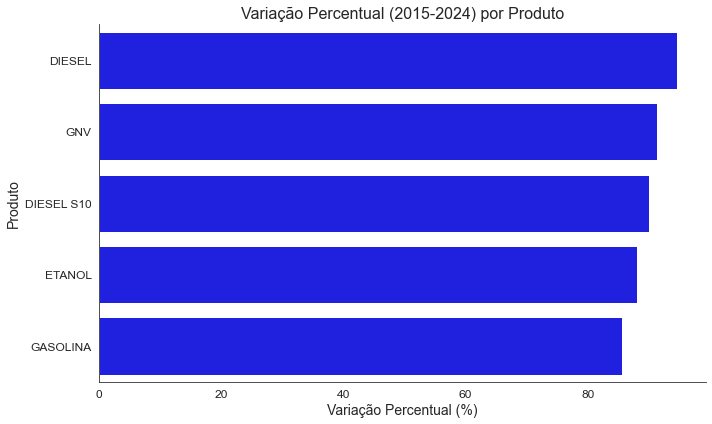

In [85]:
# Ordenando o DataFrame por Variacao_Percentual_2015 vs. 2024 para melhor visualização
df_valores_Produto = df_valores_Produto.sort_values(by='Variacao_Percentual_2015 vs. 2024', ascending=False)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y='Produto', 
    x='Variacao_Percentual_2015 vs. 2024', 
    data=df_valores_Produto, 
    color='blue'  # Todas as barras na cor azul
)

# Adicionando título e rótulos
plt.title('Variação Percentual (2015-2024) por Produto', fontsize=16)
plt.xlabel('Variação Percentual (%)', fontsize=14)
plt.ylabel('Produto', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Removendo o contorno e os espinhos desnecessários
ax.spines['top'].set_visible(False)
ax.spines.right.set_visible(False)
ax.set_frame_on(True)


# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()

### Correlação entre os valores por tipos de combustíveis

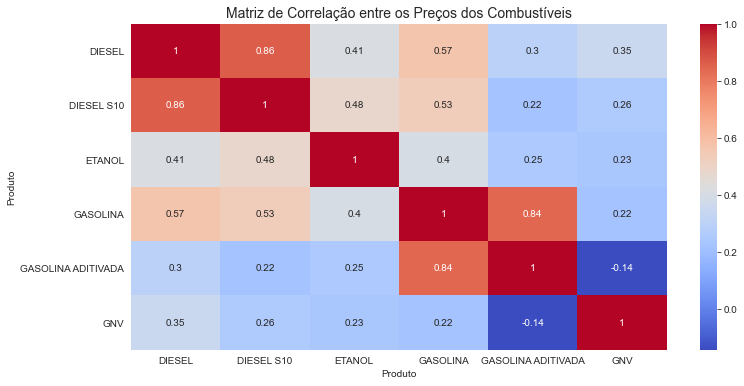

In [61]:
# Agrupando os dados por estado e calculando a média dos preços por combustível
plt.figure(figsize=(12, 6))
preco_medio_por_estado_e_combustivel = df_filtrado.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().unstack()

# Calculando a matriz de correlação
correlacao = preco_medio_por_estado_e_combustivel.corr()

# Criando o mapa de calor da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre os Preços dos Combustíveis' ,fontsize=14)
plt.show()